In [1]:
import nbformat

Let's see what read method of nbformat needs

In [2]:
nbformat.read?

Signature: nbformat.read(fp, as_version, capture_validation_error=None, **kwargs)
Docstring:
Read a notebook from a file as a NotebookNode of the given version.

The string can contain a notebook of any version.
The notebook will be returned `as_version`, converting, if necessary.

Notebook format errors will be logged.

Parameters
----------
fp : file or str
    A file-like object with a read method that returns unicode (use
    ``io.open()`` in Python 2), or a path to a file.
as_version : int
    The version of the notebook format to return.
    The notebook will be converted, if necessary.
    Pass nbformat.NO_CONVERT to prevent conversion.
capture_validation_error : dict, optional
    If provided, a key of "ValidationError" with a
    value of the ValidationError instance will be added
    to the dictionary.

Returns
-------
nb : NotebookNode
    The notebook that was read.
File:      ~/miniconda/envs/jnbformat/lib/python3.12/site-packages/nbformat/__init__.py
Type:      function

So it needs a file-like object and as_version

In [4]:
with open('notebook_to_read.ipynb', 'r') as f:
    notebook = nbformat.read(f, as_version=4)

In [5]:
# What is the type of notebook?
type(notebook)

nbformat.notebooknode.NotebookNode

In [6]:
notebook

{'cells': [{'cell_type': 'markdown',
   'metadata': {},
   'source': '# This is a markdown cell'},
  {'cell_type': 'markdown',
   'metadata': {},
   'source': 'This is a multi-line markdown cell.\n\nI want to see what it looks like when I read it\n'},
  {'cell_type': 'code',
   'execution_count': 1,
   'metadata': {},
   'outputs': [],
   'source': 'import numpy as np \nimport matplotlib.pyplot as plt\nfrom PIL import Image'},
  {'cell_type': 'code',
   'execution_count': 2,
   'metadata': {},
   'outputs': [],
   'source': '# This is a commented out cell'},
  {'cell_type': 'code',
   'execution_count': 3,
   'metadata': {},
   'outputs': [],
   'source': 'a = 10'},
  {'cell_type': 'code',
   'execution_count': 4,
   'metadata': {},
   'outputs': [],
   'source': 'b = 20\nc = 100'},
  {'cell_type': 'code',
   'execution_count': 5,
   'metadata': {},
   'outputs': [{'name': 'stdout',
     'output_type': 'stream',
     'text': 'I want to see print statements stored in jupyter notebook\n'

In [7]:
# It looks like a dictionary. Let's see the keys
notebook.keys()

dict_keys(['cells', 'metadata', 'nbformat', 'nbformat_minor'])

In [10]:
cells = notebook['cells']

In [11]:
type(cells)

list

In [9]:
# how many cells?
len(notebook['cells'])

24

In [12]:
# what are in the cells?
cells[0]

{'cell_type': 'markdown',
 'metadata': {},
 'source': '# This is a markdown cell'}

In [13]:
cells[1]

{'cell_type': 'markdown',
 'metadata': {},
 'source': 'This is a multi-line markdown cell.\n\nI want to see what it looks like when I read it\n'}

In [14]:
cells[2]

{'cell_type': 'code',
 'execution_count': 1,
 'metadata': {},
 'outputs': [],
 'source': 'import numpy as np \nimport matplotlib.pyplot as plt\nfrom PIL import Image'}

In [15]:
cells[-5]

{'cell_type': 'code',
 'execution_count': 13,
 'metadata': {},
 'outputs': [],
 'source': "with open('textfile1.txt', 'w') as f:\n    f.write('I am writing')"}

In [16]:
# It looks like there is 'cell_type' key has code or markdown. How many code cells?
len([cell for cell in cells if cell['cell_type'] == 'code'])

15

In [17]:
# How many markdown cells?
len([cell for cell in cells if cell['cell_type'] == 'markdown'])

9

In [27]:
# How does markdown cell look like?
cells[0]

{'cell_type': 'markdown',
 'metadata': {},
 'source': '# This is a markdown cell'}

In [28]:
cells[1]

{'cell_type': 'markdown',
 'metadata': {},
 'source': 'This is a multi-line markdown cell.\n\nI want to see what it looks like when I read it\n'}

source key contains the markdown text

In [30]:
# How does commented out code look like?
cells[3]

{'cell_type': 'code',
 'execution_count': 2,
 'metadata': {},
 'outputs': [],
 'source': '# This is a commented out cell'}

Cell type is code but source is the commented out code and outputs is empty list

In [31]:
# How does a code cell without output look like?
cells[4]

{'cell_type': 'code',
 'execution_count': 3,
 'metadata': {},
 'outputs': [],
 'source': 'a = 10'}

In [32]:
cells[5]

{'cell_type': 'code',
 'execution_count': 4,
 'metadata': {},
 'outputs': [],
 'source': 'b = 20\nc = 100'}

Source contains code as string

In [33]:
# How does print statement look like?
cells[6]

{'cell_type': 'code',
 'execution_count': 5,
 'metadata': {},
 'outputs': [{'name': 'stdout',
   'output_type': 'stream',
   'text': 'I want to see print statements stored in jupyter notebook\n'}],
 'source': 'print("I want to see print statements stored in jupyter notebook")'}

In [34]:
cells[6]['outputs']

[{'name': 'stdout',
  'output_type': 'stream',
  'text': 'I want to see print statements stored in jupyter notebook\n'}]

In [35]:
cells[6]['source']

'print("I want to see print statements stored in jupyter notebook")'

Outputs is a list dictionaries with output_type as stream? Should figure out what it is

In [36]:
# What is the output of a cell that is printing out a variable without using print statement? How does it differ from print()?
cells[7]

{'cell_type': 'code',
 'execution_count': 6,
 'metadata': {},
 'outputs': [{'data': {'text/plain': '20'},
   'execution_count': 6,
   'metadata': {},
   'output_type': 'execute_result'}],
 'source': 'b'}

In [37]:
cells[7]['outputs']

[{'data': {'text/plain': '20'},
  'execution_count': 6,
  'metadata': {},
  'output_type': 'execute_result'}]

So code executed will have output_type as 'execute_result' and there is also another field called 'data' which contains the result in plain text.

In [38]:
# What is the output of a cell that is calculating something? Any change here?
cells[8]

{'cell_type': 'code',
 'execution_count': 7,
 'metadata': {},
 'outputs': [{'data': {'text/plain': '80'},
   'execution_count': 7,
   'metadata': {},
   'output_type': 'execute_result'}],
 'source': 'c - b'}

No change here. Thing to note is that there is a field called execution_count which keeps track of when the cell was executed.

In [40]:
# How does latex cell show up as?
cells[9]

{'cell_type': 'markdown',
 'metadata': {},
 'source': 'Below is a formula in lates. How does that show up?'}

In [41]:
cells[10]

{'cell_type': 'markdown',
 'metadata': {},
 'source': '$$c = \\sqrt{a^2 + b^2}$$'}

Same as markdown but it shows up as a string in source

In [43]:
# How does another method which is not just streaming text but calculating something show up as?
cells[11] # not this

{'cell_type': 'code',
 'execution_count': 8,
 'metadata': {},
 'outputs': [],
 'source': 't = np.linspace(0, 2, 100)\ny = np.sin(t)'}

In [44]:
cells[12]

{'cell_type': 'code',
 'execution_count': 9,
 'metadata': {},
 'outputs': [{'data': {'text/plain': '100'},
   'execution_count': 9,
   'metadata': {},
   'output_type': 'execute_result'}],
 'source': 'len(t)'}

Same as other code cell

In [46]:
# How about plots?
cells[13]

{'cell_type': 'markdown', 'metadata': {}, 'source': 'How will plots show up?'}

In [47]:
cells[14]

{'cell_type': 'code',
 'execution_count': 10,
 'metadata': {},
 'outputs': [{'data': {'text/plain': '[<matplotlib.lines.Line2D at 0x7f37cb5b8b60>]'},
   'execution_count': 10,
   'metadata': {},
   'output_type': 'execute_result'},
  {'data': {'image/png': 'iVBORw0KGgoAAAANSUhEUgAAAiMAAAGdCAYAAADAAnMpAAAAP3RFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMS5wb3N0MSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8kixA/AAAACXBIWXMAAA9hAAAPYQGoP6dpAABD10lEQVR4nO3deVxU5f4H8M/MwAw7iOw4irghIuCKWKYWSmam3cqlckvtZuYvo7pppWbe0sqtrt4sb2blrrmVZhlJK2qCqLiguIEgICIz7AMzz+8PcooEZRA4s3zer9e8lMNzZr6Ph2E+nvOc55EJIQSIiIiIJCKXugAiIiKybQwjREREJCmGESIiIpIUwwgRERFJimGEiIiIJMUwQkRERJJiGCEiIiJJMYwQERGRpOykLqA+DAYDsrOz4erqCplMJnU5REREVA9CCBQVFSEgIAByed3nPywijGRnZ0OtVktdBhERETVAZmYmWrVqVef3LSKMuLq6AqjujJubm8TVEBERUX1otVqo1Wrj53hdLCKM3Lg04+bmxjBCRERkYW43xIIDWImIiEhSDCNEREQkKYYRIiIikhTDCBEREUmKYYSIiIgkxTBCREREkmIYISIiIkkxjBAREZGkGEaIiIhIUiaHkZ9++gnDhg1DQEAAZDIZduzYcdt9EhIS0L17d6hUKrRv3x5r1qxpQKlERERkjUwOIyUlJYiIiMCKFSvq1f7ChQsYOnQoBg

This looks interesting. How many outputs?

In [49]:
len(cells[14]['outputs'])

2

In [51]:
cells[14]['outputs'][0] # This is probably the line that shows up when there is no semi-colon at the end of plot command

{'data': {'text/plain': '[<matplotlib.lines.Line2D at 0x7f37cb5b8b60>]'},
 'execution_count': 10,
 'metadata': {},
 'output_type': 'execute_result'}

In [52]:
cells[14]['outputs'][1]

{'data': {'image/png': 'iVBORw0KGgoAAAANSUhEUgAAAiMAAAGdCAYAAADAAnMpAAAAP3RFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMS5wb3N0MSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8kixA/AAAACXBIWXMAAA9hAAAPYQGoP6dpAABD10lEQVR4nO3deVxU5f4H8M/MwAw7iOw4irghIuCKWKYWSmam3cqlckvtZuYvo7pppWbe0sqtrt4sb2blrrmVZhlJK2qCqLiguIEgICIz7AMzz+8PcooEZRA4s3zer9e8lMNzZr6Ph2E+nvOc55EJIQSIiIiIJCKXugAiIiKybQwjREREJCmGESIiIpIUwwgRERFJimGEiIiIJMUwQkRERJJiGCEiIiJJMYwQERGRpOykLqA+DAYDsrOz4erqCplMJnU5REREVA9CCBQVFSEgIAByed3nPywijGRnZ0OtVktdBhERETVAZmYmWrVqVef3LSKMuLq6AqjujJubm8TVEBERUX1otVqo1Wrj53hdLCKM3Lg04+bmxjBCRERkYW43xIIDWImIiEhSDCNEREQkKYYRIiIikhTDCBEREUmKYYSIiIgkxTBCREREkmIYISIiIkkxjBAREZGkGEaIiIhIUiaHkZ9++gnDhg1DQEAAZDIZduzYcdt9EhIS0L17d6hUKrRv3x5r1qxpQKlERERkjUwOIyUlJYiIiMCKFSvq1f7ChQsYOnQoBg4ciJSUFMyYMQOTJ0/Gt99+a3KxREREZH1MXptmyJAhGDJkSL3br1y5Em3btsXixYsBAJ07d8Yvv/yCpUuXIjY21tSXJyIiIivT5AvlJSYmIiYmpsa22NhYzJgxo859KioqUFFRYfxaq9U2VXlERNSIdFUGFJbpoCmthKasEoWlldCWV6KsUo/ySgPKK/Uor9RDpzdACMBgEBAADELAXiGHnVwGe4UcSjs5VHZyuKjs

Output type is display_data probably meaning that plot is being displayed on the screen. Can I recreate the plot with the text?

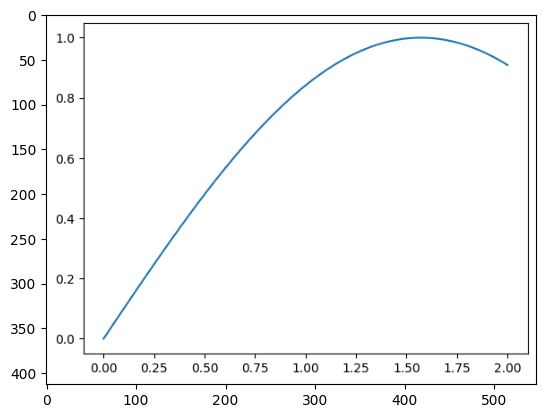

In [57]:
import base64
import io
from PIL import Image
import matplotlib.pyplot as plt

image_data_encoded = cells[14]['outputs'][1]['data']['image/png']
image_data = base64.b64decode(image_data_encoded)
image = Image.open(io.BytesIO(image_data))
plt.imshow(image)